In [6]:
from qutip import *
from scipy import *
from random import *

import numpy as np
import matplotlib.pyplot as plt


N = 9
M = 512


h  = 1.0
Jz = 1.0
Jx = 2.0

# Jy = 1.0 * 2 * pi * (1 - 2 * rand(N))


taumax = 0.0001
taulist = np.linspace(0, taumax, 3)

si = qeye(2)
sx = sigmax()
sz = sigmaz()

# sy = sigmay()

si_list = []
sx_list = []
sz_list = []

# sy_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)
        

    op_list[n] = sx
    sx_list.append(tensor(op_list))
    
    op_list[n] = sz
    sz_list.append(tensor(op_list))
    
    op_list[n] = si
    si_list.append(tensor(op_list))

# basis(0) for |-1| spin down 1 for |+1| spin up

# x(0) for sz |-1| spin down x(1) for sz |+1| spin up
# x = (sz+1)/2   sz=(-1) => x=0 sz=(+1) => x=1

psi_list = [basis(2,0) for n in range(N)]
psi0 = tensor(psi_list)
# for n in range(N):
#     psi_list.append(basis(2,randrange(1)))
# psi_list = [basis(2,0) for n in range(N)]
psi0 = tensor(psi_list)
#H0 transverse term
H0 = 0    
for n in range(N):
    H0 += Jx * sx_list[n]
    
    
#Hp problem term
Hp = 0   
vertex_sum = 0
for n in range(N):
    vertex_sum += sz_list[n]
Hp += h * vertex_sum
# for n in range(N):
#     Hp += h[n] * sz_list[n]


In [7]:
for n in range(N-1):
    # interaction terms
    Hp += Jz * sz_list[n] * sz_list[n+1]


In [8]:


# the time-dependent hamiltonian in list-function format
args = {'t_max': max(taulist)}

h_t = [[H0, lambda t, args : -(args['t_max']-t)/args['t_max']],
       [Hp, lambda t, args : -t/args['t_max']]]

evals_mat = np.zeros((len(taulist),M))
ekets_mat = np.zeros((len(taulist),M),dtype = object)

# P_mat = np.zeros((len(taulist),M))
H = 0

idx = [0]
def process_rho(tau, psi):
  
    # evaluate the Hamiltonian with gradually switched on interaction 
    H = Qobj.evaluate(h_t, tau, args)
    
    # find the M lowest eigenvalues of the system
    evals, ekets = H.eigenstates(eigvals=M)
#     print(ekets[0].shape)

    evals_mat[idx[0],:] = real(evals)
    ekets_mat[idx[0],:] = ekets
    
#     # find the overlap between the eigenstates and psi 
#     for n, eket in enumerate(ekets):
#         P_mat[idx[0],n] = abs(eket.overlap(psi))**2
#         P_mat[idx[0],n] = abs((eket.dag().data * psi.data)[0,0])**2
        
    idx[0] += 1
    
sesolve(h_t, psi0, taulist, process_rho, args, options=Options(nsteps=100000), _safe_mode=True)

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0

Text(0.5, 1.0, 'Energyspectrum (512 lowest values) of a chain of 9 spins.\n The occupation probabilities are encoded in the red line widths.')

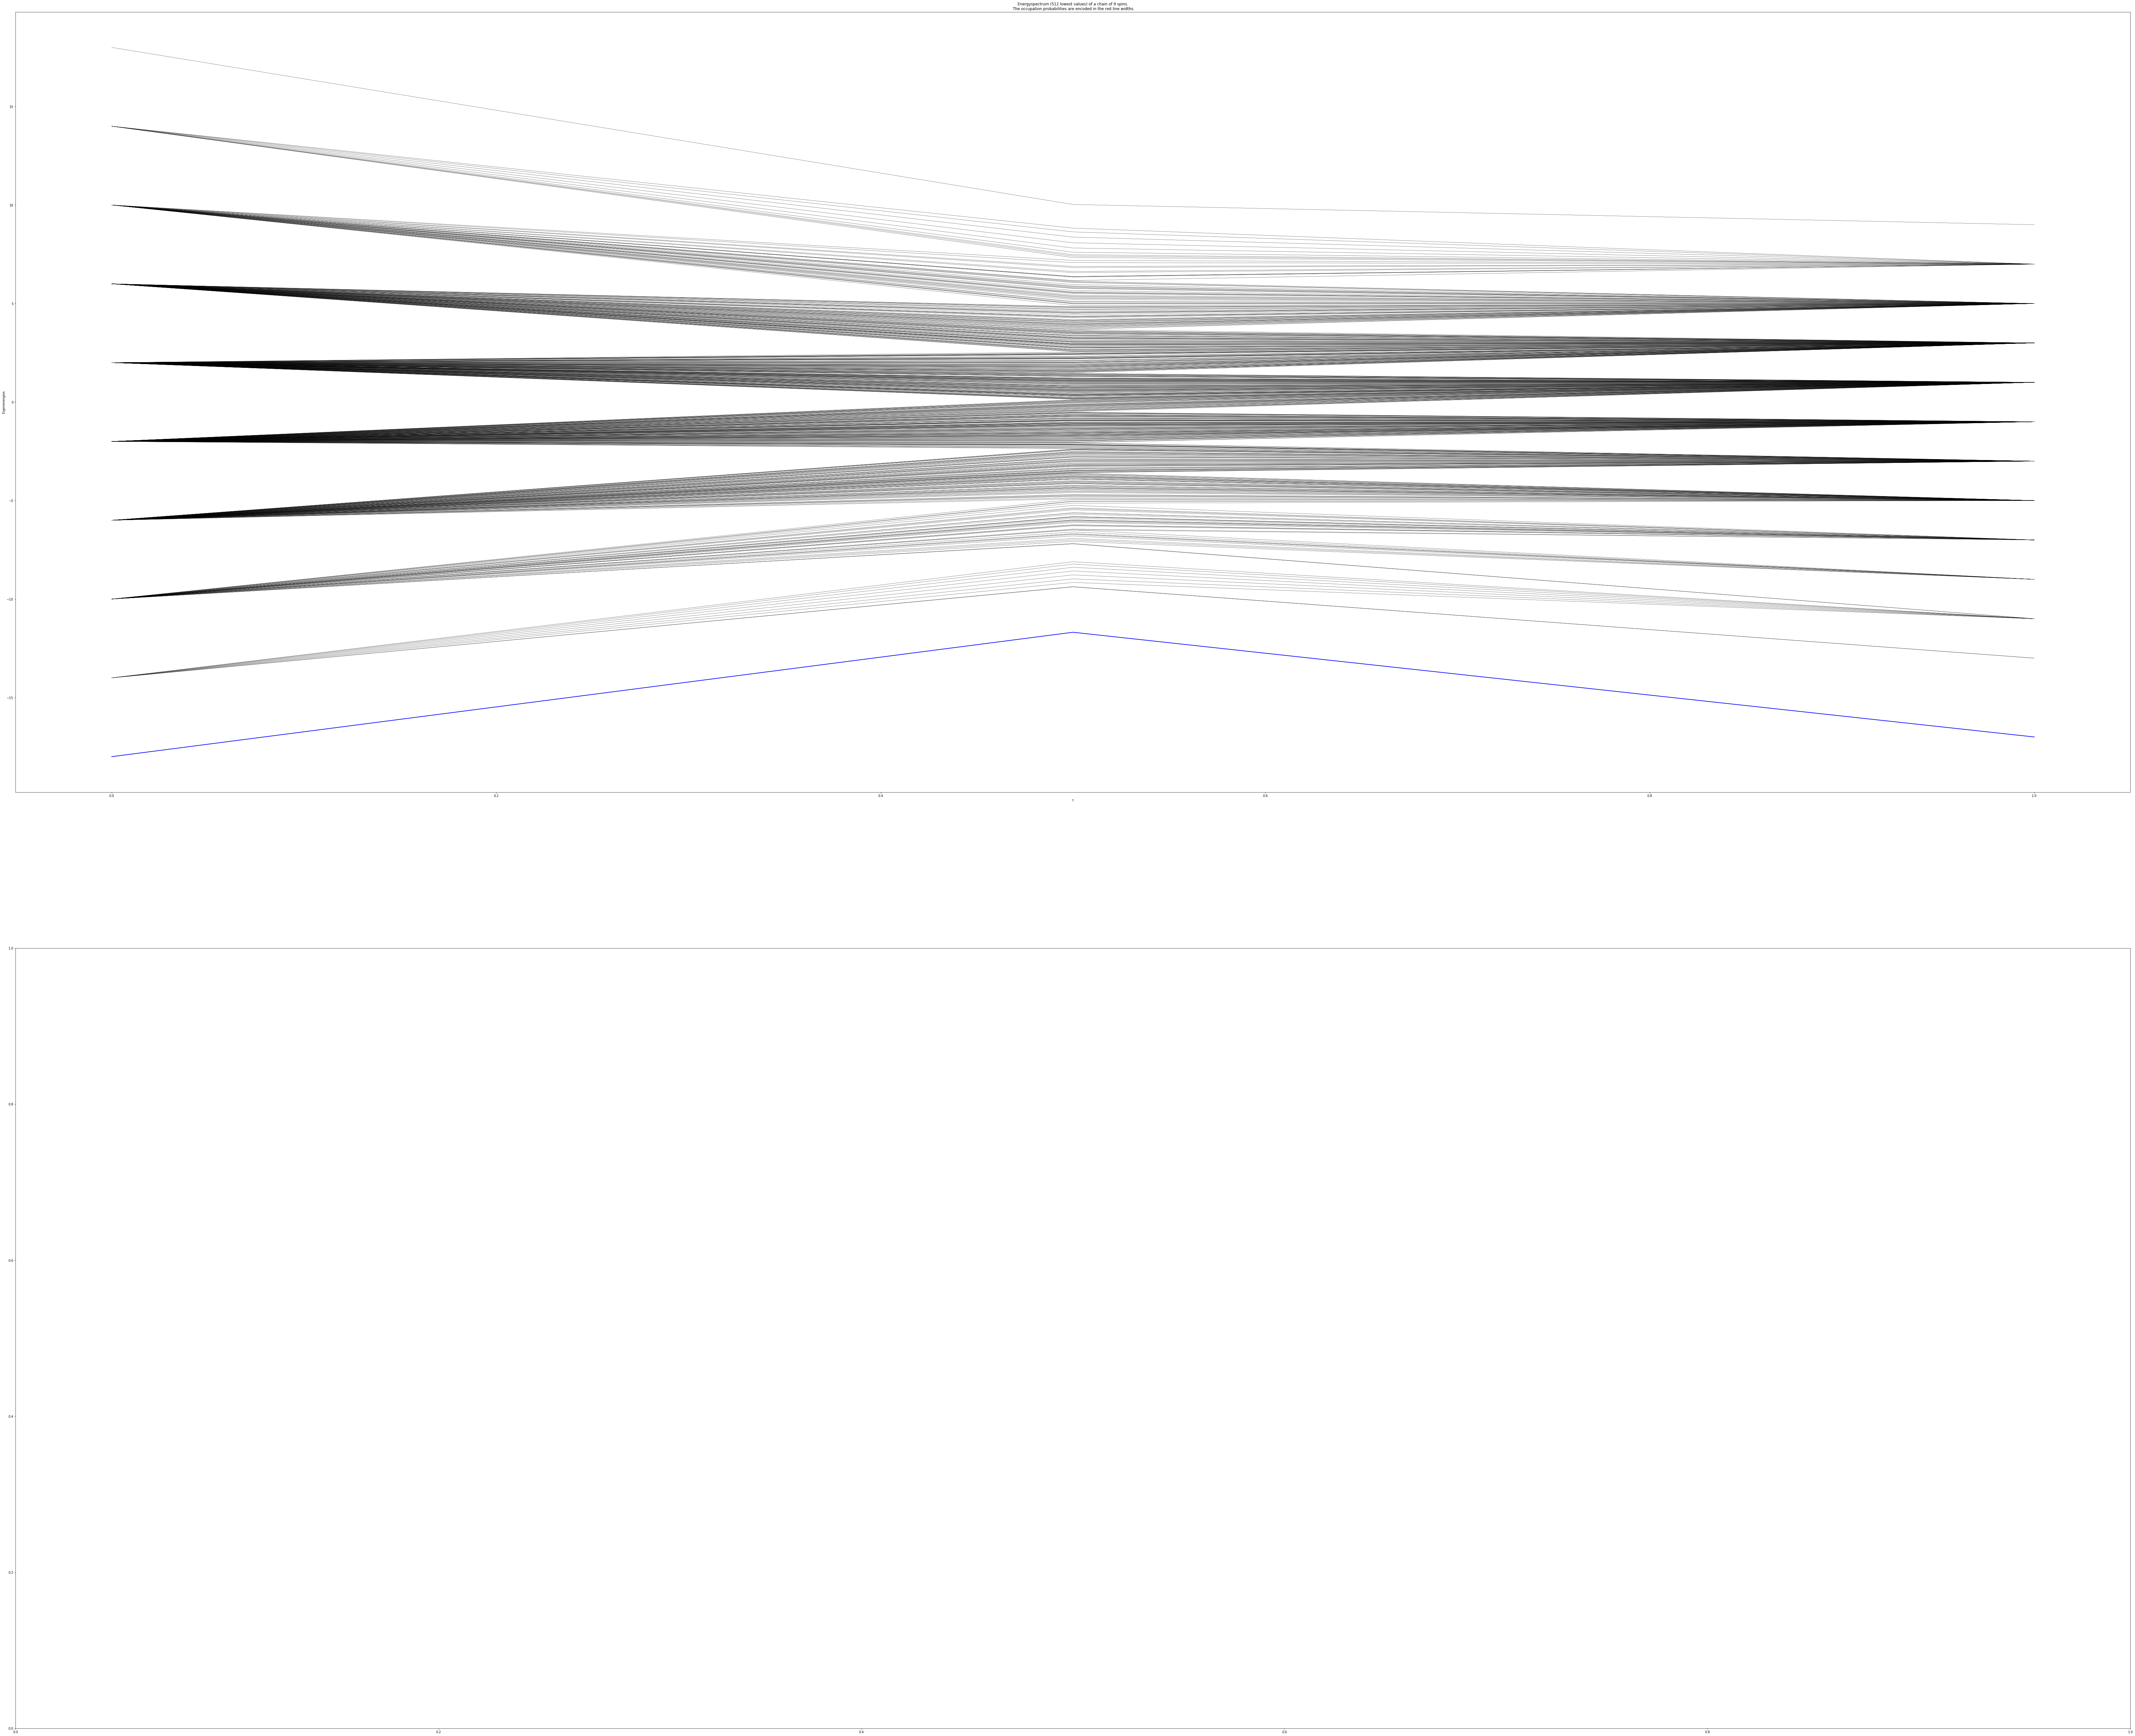

In [12]:
# f = plt.figure()
fig, axes = plt.subplots(2, 1, figsize=(120,100))

#
# plot the energy eigenvalues
#

# first draw thin lines outlining the energy spectrum
for n in range(len(evals_mat[0,:])):
    ls,lw = ('b',2) if n == 0 else ('k', 0.5)
    axes[0].plot(taulist/max(taulist), evals_mat[:,n], ls, lw=lw)

# second, draw line that encode the occupation probability of each state in 
# its linewidth. thicker line => high occupation probability.
# for idx in range(len(taulist)-1):
#     for n in range(len(P_mat[0,:])):
#         lw = 0.5 + 4*P_mat[idx,n]    
#         if lw > 0.5215:
#            axes[0].plot(array([taulist[idx], taulist[idx+1]])/taumax, 
#                         array([evals_mat[idx,n], evals_mat[idx+1,n]]), 
#                         'r', linewidth=lw)    
        
axes[0].set_xlabel(r'$\tau$')
axes[0].set_ylabel('Eigenenergies')
axes[0].set_title("Energyspectrum (%d lowest values) of a chain of %d spins.\n " % (M,N)
                + "The occupation probabilities are encoded in the red line widths.")

#
# plot the occupation probabilities for the few lowest eigenstates
#
# for n in range(len(P_mat[0,:])):
#     if n == 0:
#         axes[1].plot(taulist/max(taulist), 0 + P_mat[:,n], 'r', linewidth=2)
#     else:
#         axes[1].plot(taulist/max(taulist), 0 + P_mat[:,n])

# axes[1].set_xlabel(r'$\tau$')
# axes[1].set_ylabel('Occupation probability')
# axes[1].set_title("Occupation probability of the %d lowest " % M +
#                   "eigenstates for a chain of %d spins" % N)
# axes[1].legend(("Ground state",));


In [10]:
print(evals_mat[len(taulist)-2])

[-1.16855657e+01 -9.38283628e+00 -9.37057453e+00 -9.15569552e+00
 -8.97601221e+00 -8.77531226e+00 -8.57437057e+00 -8.38747546e+00
 -8.22622875e+00 -8.10587625e+00 -7.19867693e+00 -7.18181707e+00
 -7.07332749e+00 -6.99683327e+00 -6.92631202e+00 -6.79916884e+00
 -6.72937775e+00 -6.68696476e+00 -6.68409235e+00 -6.59299407e+00
 -6.48919546e+00 -6.48762688e+00 -6.44899490e+00 -6.28495363e+00
 -6.24958658e+00 -6.22826462e+00 -6.11085300e+00 -6.06387493e+00
 -6.01862550e+00 -5.99413960e+00 -5.97851911e+00 -5.89585032e+00
 -5.83408795e+00 -5.82573272e+00 -5.81288272e+00 -5.68979451e+00
 -5.62213152e+00 -5.62092767e+00 -5.46772512e+00 -5.41345546e+00
 -5.37141813e+00 -5.24665383e+00 -5.13411870e+00 -5.04643376e+00
 -5.02809033e+00 -4.94474373e+00 -4.91324210e+00 -4.85942926e+00
 -4.78664019e+00 -4.76082965e+00 -4.72162232e+00 -4.69424776e+00
 -4.59639621e+00 -4.54942602e+00 -4.51591084e+00 -4.46301010e+00
 -4.42839495e+00 -4.38707740e+00 -4.35281562e+00 -4.35226696e+00
 -4.33503157e+00 -4.28162

In [ ]:
H0


In [ ]:
psi_list

In [ ]:
psi0.ptrace(3)

In [ ]:
psi0.shape

In [ ]:
sz_list

In [ ]:
print(psi0.data)


In [5]:
evals_f, ekets_f = (-1 * Hp).eigenstates(eigvals=M)
ekets_mat[len(taulist)-1][0].overlap(ekets_f[0])

(1+0j)

In [13]:
# Lanczos algorithm
# initial iteration step

k = 100

v0 = psi0.unit()

w_prime = (-1) * Hp * v0
a0 = w_prime.dag() * v0
w0 = w_prime - a0 * v0
w_list = np.zeros((k),dtype = object)
w_list[0] = w0

b_list = np.zeros(k)
a_list = np.zeros(k,dtype = object)
a_list[0] = a0
v_list = np.zeros((k),dtype = object)
v_list[0] = v0

In [14]:
# Lanczos algorithm

def orthog(v):
    '''Householder transformation'''
#     Householder transformation
    u, indices = unique(v, return_index = True)
    ind = randint(0,max(v.shape)-1)
    while ind == max(indices):
        ind = randint(0,max(v.shape)-1)
    v_prime = np.zeros(v.shape)
    v_prime[ind] = 1.0
    v_prime = Qobj(v_prime, dims = v.dims)
    n = (v - v_prime).unit()
    
    P = si_list[0] - (2.0 * n * n.dag())
    m = np.zeros(v.shape)
    ind_m = randint(0,max(v.shape)-1)
    while ind_m == ind:
        ind_m = randint(0,max(v.shape)-1)
    m[ind_m] = 1.0
    m = Qobj(m, dims = v.dims)
    return Qobj(P * m)

def OutOrthog(v_list,j):
    for v in v_list[0:j]:
        output = orthog(v)
        for w in v_list[0:j]:
            if output.overlap(w) != 0:
                break
        else:
            return output
        

for j in range(1,k):
    b_list[j] = w_list[j-1].norm()
    if b_list[j] != 0:
        v_list[j] = Qobj((w_list[j-1] / b_list[j]),dims = v0.dims)
#         print("one")
    else:
        v_list[j] = OutOrthog(v_list,j)
#         print("two")
    w_prime = Qobj(((-1) * Hp * v_list[j]),dims = (Hp * v0).dims)
    a_list[j] = w_prime.dag() * v_list[j]
    w_list[j] = Qobj(w_prime - (a_list[j] * v_list[j])) - (b_list[j] * v_list[j-1])
    


In [15]:
for j in range(len(a_list)):
    a_list[j] = real(a_list[j].full()).item()
    b_list[j] = real(b_list[j])
T = diagflat(a_list) + diagflat(b_list[1:len(b_list)],1) + diagflat(b_list[1:len(b_list)],-1)

In [17]:
print(T)

[[-17.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 5.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 1.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 3.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 -3.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 -1.0]]


In [18]:
evals, ekets = (-1 * Hp).eigenstates(eigvals=M)

In [11]:
spin = 0


for num in range(9):
    spin = ekets_mat[len(taulist)-1][0].ptrace(num)
    if spin == basis(2,0).proj():
        print(0, end = '')
    elif spin == basis(2,1).proj():
        print(1, end = '')
print("\n")


000000000



In [19]:
evals

array([-17., -13., -13., -11., -11., -11., -11., -11., -11., -11., -11.,
       -11.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -7.,
        -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -7.,
        -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -7.,  -5.,  -5.,
        -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,
        -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,
        -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,
        -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -5.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -